In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Exploratory data analysis to understand the dataset and uncover patterns, relationships, and anomalies within the processed data. 

In [44]:
# Loading the training data
train = pd.read_csv('Dataset_Processed/train_Processed.csv')
Features = train.columns.values.tolist()
Features.remove('Exited')

In [45]:
# Getting some statistics about the data
train.describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,surname_tfidf_0,surname_tfidf_1,surname_tfidf_2,surname_tfidf_3,surname_tfidf_4,surname_tfidf_5,surname_tfidf_6,surname_tfidf_7,surname_tfidf_8,surname_tfidf_9
count,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,...,1.750320e+05,175032.000000,175032.000000,1.750320e+05,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000
mean,0.211224,0.612232,0.654132,0.563354,0.272585,5.019933,0.225900,1.553070,0.751188,0.498743,...,1.970838e-02,0.014078,0.010564,1.036644e-02,0.010240,0.008956,0.005971,0.010070,0.007725,0.011384
std,0.102603,0.162299,0.817512,0.495971,0.121210,2.811133,0.251027,0.549211,0.432326,0.500000,...,1.390048e-01,0.118044,0.101943,9.730101e-02,0.095795,0.095098,0.095226,0.093395,0.088424,0.085524
min,0.004799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-1.001446e-03,-0.010341,-0.017731,-2.746484e-02,-0.025721,-0.042918,-0.214323,-0.086085,-0.143069,-0.188587
25%,0.157907,0.494000,0.000000,0.000000,0.189189,3.000000,0.000000,1.000000,1.000000,0.000000,...,-4.047454e-08,-0.000003,-0.000003,-9.691476e-07,-0.000010,-0.000006,-0.000053,-0.000031,-0.000022,-0.000021
50%,0.200782,0.618000,0.000000,1.000000,0.256757,5.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,3.338623e-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.251831,0.720000,1.000000,1.000000,0.324324,7.000000,0.481183,2.000000,1.000000,1.000000,...,4.788243e-07,0.000001,0.000022,4.484236e-05,0.000017,0.000008,0.000002,0.000029,0.000031,0.000061
max,0.901394,1.000000,2.000000,1.000000,1.000000,10.000000,1.000000,4.000000,1.000000,1.000000,...,9.999984e-01,0.999854,0.998931,9.946805e-01,0.993317,0.994130,0.972105,0.937298,0.975964,0.849508


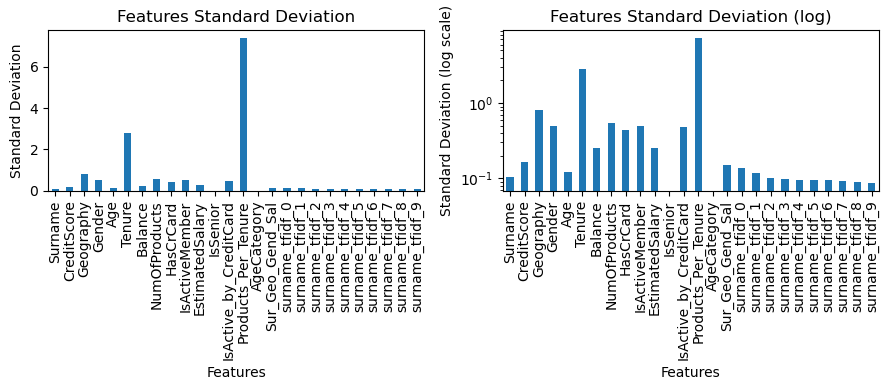

In [46]:
# Plotting the Standard Dev bar plot
plt.subplot(121)
train[Features].std().plot(kind='bar', figsize=(9, 4))
plt.title("Features Standard Deviation")
plt.xlabel("Features")
plt.ylabel("Standard Deviation")

# Plotting the Standard Dev (Log) bar plot
plt.subplot(122)
train[Features].std().plot(kind='bar', figsize=(9, 4), logy=True)
plt.title("Features Standard Deviation (log)")
plt.xlabel("Features")
plt.ylabel("Standard Deviation (log scale)")

# Display the plots
plt.tight_layout()
plt.show()

In [47]:
train[Features].corrwith(train.Exited).sort_values(ascending=False)

Age                       0.336608
Sur_Geo_Gend_Sal          0.221111
Surname                   0.134909
Balance                   0.128387
Products_Per_Tenure       0.080207
Geography                 0.052209
EstimatedSalary           0.018598
surname_tfidf_2           0.015393
surname_tfidf_8           0.009432
surname_tfidf_9           0.005824
surname_tfidf_5           0.005220
surname_tfidf_4           0.001800
surname_tfidf_1          -0.000304
surname_tfidf_6          -0.003849
surname_tfidf_7          -0.013106
surname_tfidf_3          -0.013418
surname_tfidf_0          -0.016365
Tenure                   -0.019250
HasCrCard                -0.021117
CreditScore              -0.027229
Gender                   -0.144116
IsActive_by_CreditCard   -0.175643
NumOfProducts            -0.204494
IsActiveMember           -0.207210
IsSenior                       NaN
AgeCategory                    NaN
dtype: float64

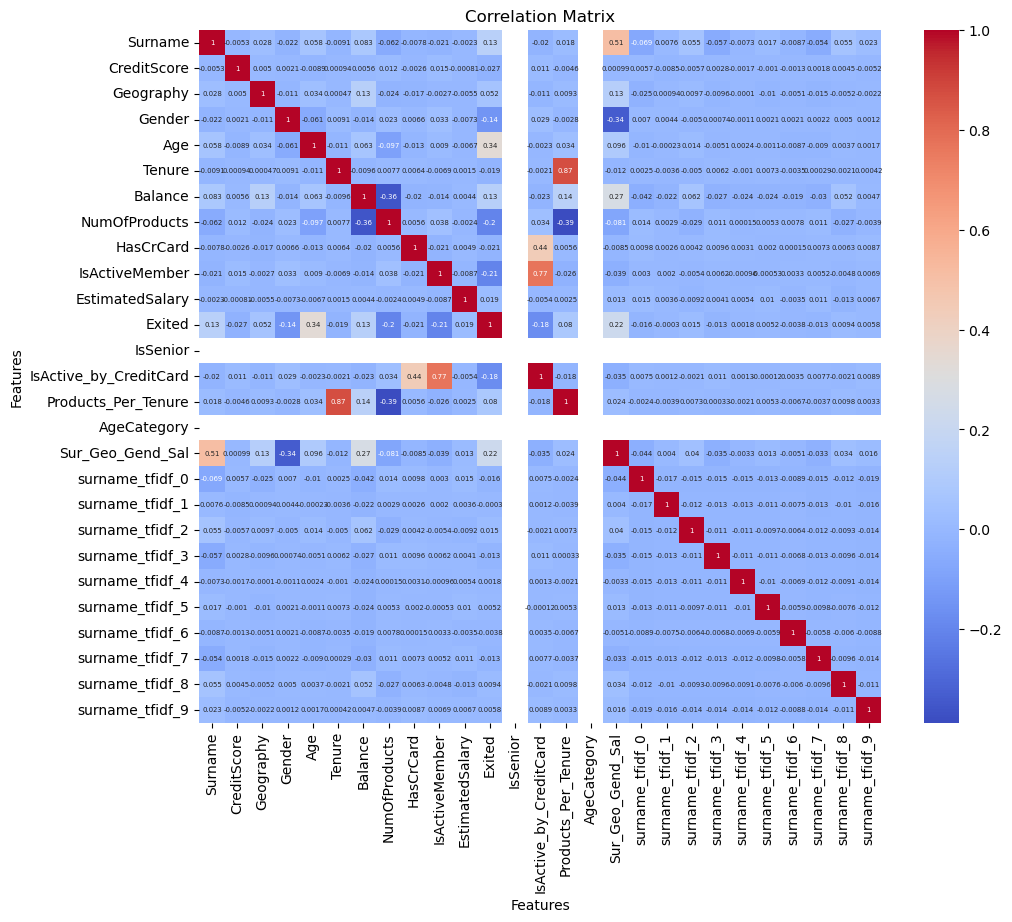

In [48]:
# Correlation matrix of full dataset
corr = train.corr()
# Plotting the correlation matrix
plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm',  annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [49]:
# print % stat for binary classification label Exited
print("Exited = 1: ", round(train.Exited[train.Exited==1].count()/train.Exited.count()*100, 2), "%")
print("Exited = 0: ", round(train.Exited[train.Exited==0].count()/train.Exited.count()*100, 2), "%")

Exited = 1:  21.12 %
Exited = 0:  78.88 %


This is an unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. Therefore AUC ROC should be used for classification models evaluation instead of Accuracy due to class’s imbalance in the training data.